# Libraries

In [10]:
!pip install gower

In [119]:
import sys
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from gower import gower_matrix
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.metrics.pairwise import pairwise_distances

# Versions

In [4]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.0.2


# Datasets

In [5]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")
twogaussians42_csv = pd.read_csv("data/twogaussians42.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

X_twogaussians42 = twogaussians42_csv[['x1', 'x2']].values
y_twogaussians42 = twogaussians42_csv['label'].values

# K-means

# Circle

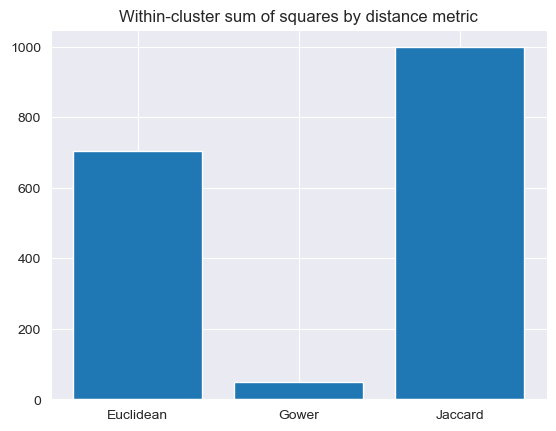

In [141]:
euclidean_dist = np.linalg.norm(X_circle[:, np.newaxis] - X_circle, axis=2)
gower_dist = gower_matrix(X_circle)
jaccard_dist = np.zeros((len(X_circle), len(X_circle)))
for i in range(len(X_circle)):
    for j in range(i, len(X_circle)):
        num_diff = np.sum(X_circle[i] != X_circle[j])
        num_same = np.sum(X_circle[i] == X_circle[j])
        jaccard_dist[i, j] = num_diff / (num_diff + num_same)
        jaccard_dist[j, i] = jaccard_dist[i, j]

kmeans_euclidean = KMeans(n_clusters=2, random_state=0).fit(X_circle)
kmeans_gower = KMeans(n_clusters=2, random_state=0).fit(gower_dist)
kmeans_jaccard = KMeans(n_clusters=2, random_state=0).fit(jaccard_dist)

wss_euclidean = sum(np.min(euclidean_dist[:, kmeans_euclidean.labels_], axis=1)**2)
wss_gower = sum(np.min(gower_dist[:, kmeans_gower.labels_], axis=1)**2)
wss_jaccard = sum(np.min(jaccard_dist[:, kmeans_jaccard.labels_], axis=1)**2)

fig, ax = plt.subplots()
ax.bar(['Euclidean', 'Gower', 'Jaccard'], [wss_euclidean, wss_gower, wss_jaccard])
ax.set_title('Within-cluster sum of squares by distance metric')
plt.show()

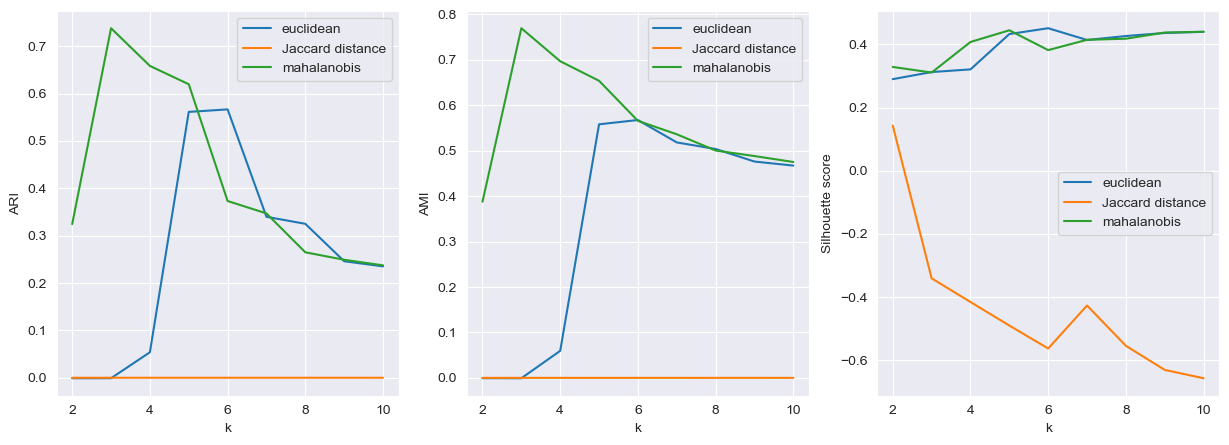

In [152]:
X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

k_range = range(2, 11)

distance_functions = ['euclidean', 'Jaccard distance', 'mahalanobis']

ari = {dist_func: [] for dist_func in distance_functions}
ami = {dist_func: [] for dist_func in distance_functions}
sil = {dist_func: [] for dist_func in distance_functions}
for i in range(len(X_circle)):
    for j in range(i, len(X_circle)):
        num_diff = np.sum(X_circle[i] != X_circle[j])
        num_same = np.sum(X_circle[i] == X_circle[j])
        jaccard_dist[i, j] = num_diff / (num_diff + num_same)
        jaccard_dist[j, i] = jaccard_dist[i, j]
for k in k_range:
    for dist_func in distance_functions:
        if dist_func == 'mahalanobis':
            cov = np.cov(X.values.T)
            inv_cov = np.linalg.inv(cov)
            dist_matrix = pairwise_distances(X, metric='mahalanobis', VI=inv_cov)
            km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-4)
            labels = km.fit_predict(dist_matrix)
        elif dist_func == 'Jaccard distance':
            km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-4)
            labels = km.fit_predict(jaccard_dist)
        elif dist_func == 'euclidean':
            km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-4)
            labels = km.fit_predict(X)
        ari[dist_func].append(adjusted_rand_score(y_true, labels))
        ami[dist_func].append(adjusted_mutual_info_score(y_true, labels))
        sil[dist_func].append(silhouette_score(X, labels))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for dist_func in distance_functions:
    ax[0].plot(k_range, ari[dist_func], label=dist_func)
    ax[1].plot(k_range, ami[dist_func], label=dist_func)
    ax[2].plot(k_range, sil[dist_func], label=dist_func)
ax[0].set_xlabel('k')
ax[0].set_ylabel('ARI')
ax[0].legend()
ax[1].set_xlabel('k')
ax[1].set_ylabel('AMI')
ax[1].legend()
ax[2].set_xlabel('k')
ax[2].set_ylabel('Silhouette score')
ax[2].legend()
plt.show()

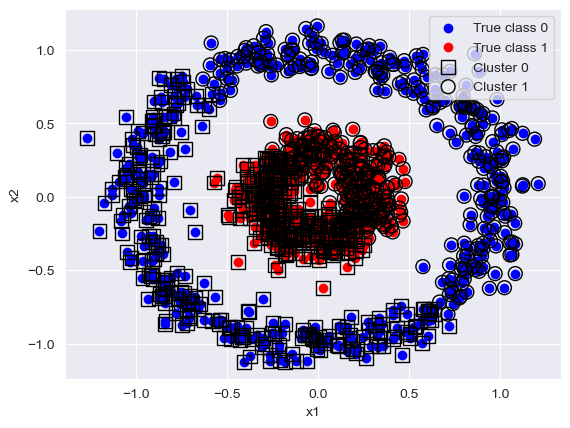

In [35]:
X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(set(kmeans.labels_), cluster_markers):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none', label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.show()

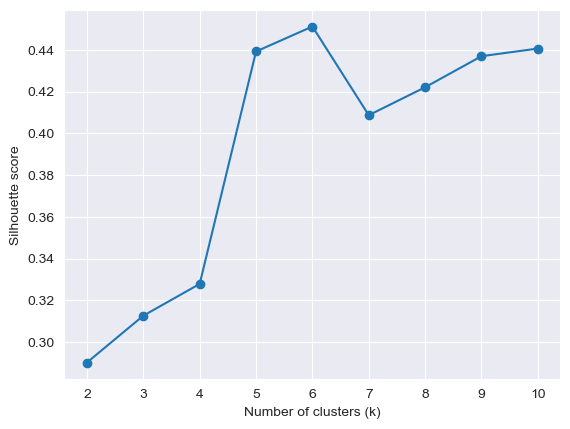

The best value of k is 6


In [37]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_circle)
    score = silhouette_score(X_circle, labels)
    silhouette_scores.append(score)

fig, ax = plt.subplots()
ax.plot(range(2, 11), silhouette_scores, '-o')
ax.set_xlabel('Number of clusters (k)')
ax.set_ylabel('Silhouette score')
plt.show()

best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'The best value of k is {best_k}')

# EM

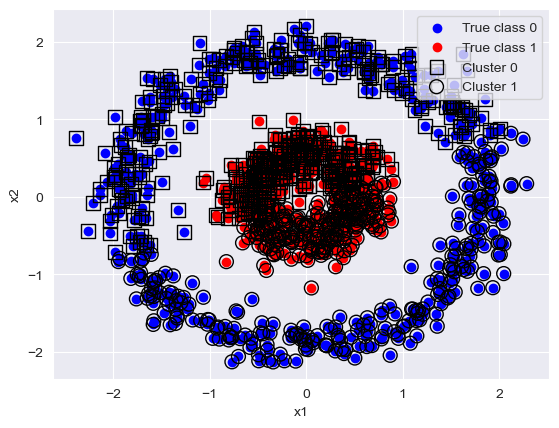

In [59]:
x_circle_col=circle_csv
x_circle_col = x_circle_col.drop('label', axis=1)
scaler_circle = preprocessing.StandardScaler()
scaler_circle.fit(X_circle)
scaled_X = scaler_circle.transform(X_circle)

xs = pd.DataFrame(scaled_X, columns = x_circle_col.columns)

from sklearn.mixture import GaussianMixture

gmm_circle = GaussianMixture(n_components=2)
gmm_y_circle = gmm_circle.fit_predict(xs)


gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(xs)
labels = gmm.predict(xs)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots()
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(list(set(labels)), cluster_markers):
    mask = labels == label
    ax.scatter(xs[mask]['x1'], xs[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none', label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.show()

# Spectural

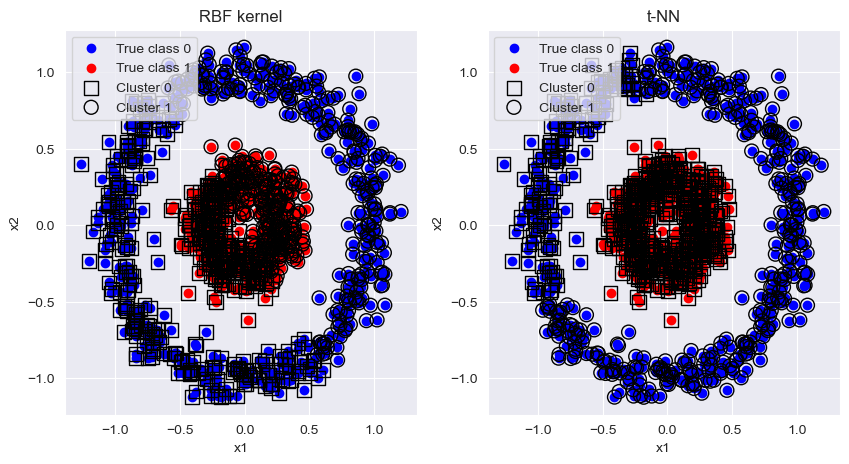

In [66]:
X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)

sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=5)
labels_tnn = sc_tnn.fit_predict(X)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'o']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_rbf).unique(), cluster_markers):
    mask = labels_rbf == label
    ax[0].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none', label=f'Cluster {label}')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('RBF kernel')
ax[0].legend()

for label, color in zip(y_true.unique(), true_colors):
    mask = y_true == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker in zip(pd.Series(labels_tnn).unique(), cluster_markers):
    mask = labels_tnn == label
    ax[1].scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors='black', facecolors='none', label=f'Cluster {label}')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('t-NN')
ax[1].legend()
plt.show()

C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\eapit\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


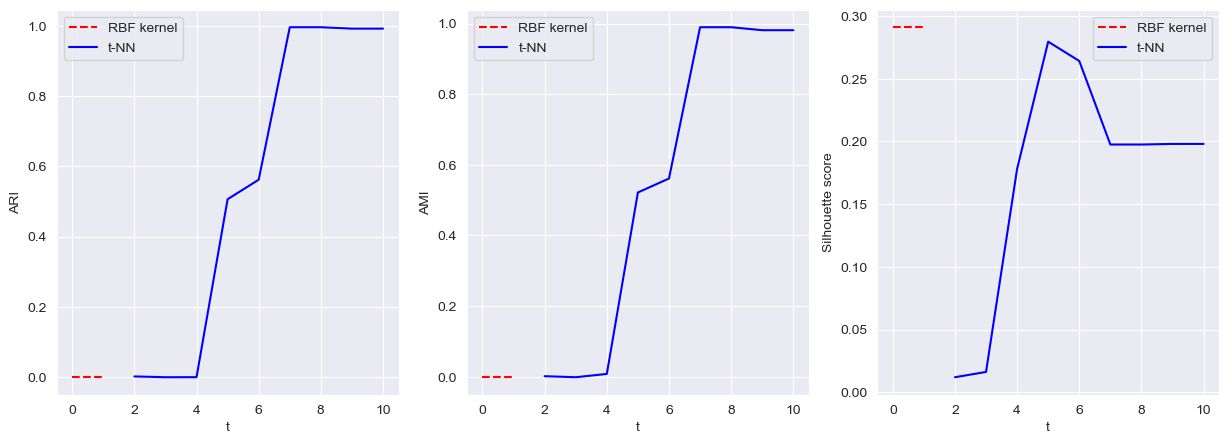

In [67]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

X = circle_csv[['x1', 'x2']]
y_true = circle_csv['label']

t_range = range(2, 11)

sc_rbf = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1)
labels_rbf = sc_rbf.fit_predict(X)
ari_rbf = adjusted_rand_score(y_true, labels_rbf)
ami_rbf = adjusted_mutual_info_score(y_true, labels_rbf)
sil_rbf = silhouette_score(X, labels_rbf)

ari_tnn = []
ami_tnn = []
sil_tnn = []
for t in t_range:
    sc_tnn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=t)
    labels_tnn = sc_tnn.fit_predict(X)
    ari_tnn.append(adjusted_rand_score(y_true, labels_tnn))
    ami_tnn.append(adjusted_mutual_info_score(y_true, labels_tnn))
    sil_tnn.append(silhouette_score(X, labels_tnn))

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot([0, 1], [ari_rbf, ari_rbf], 'r--', label='RBF kernel')
ax[0].plot(t_range, ari_tnn, 'b-', label='t-NN')
ax[0].set_xlabel('t')
ax[0].set_ylabel('ARI')
ax[0].legend()
ax[1].plot([0, 1], [ami_rbf, ami_rbf], 'r--', label='RBF kernel')
ax[1].plot(t_range, ami_tnn, 'b-', label='t-NN')
ax[1].set_xlabel('t')
ax[1].set_ylabel('AMI')
ax[1].legend()
ax[2].plot([0, 1], [sil_rbf, sil_rbf], 'r--', label='RBF kernel')
ax[2].plot(t_range, sil_tnn, 'b-', label='t-NN')
ax[2].set_xlabel('t')
ax[2].set_ylabel('Silhouette score')
ax[2].legend()
plt.show()